In [2]:
%cd /media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/

/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels


/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import pandas as pd
from functions import *
import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.regression import *


In [14]:
data0 = pd.read_csv('data/processed/kmeans_cluster.csv', index_col=0)
data0.head()

,Rentabilidade 1M,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,...,Information Ratio 3 meses,Information Ratio 6 meses,Information Ratio 12 meses,Information Ratio 24 meses,Índice de Treynor No mês,Índice de Treynor 3 meses,Índice de Treynor 6 meses,Índice de Treynor 12 meses,Índice de Treynor 24 meses,Cluster
"(0, 1, 2, 3)",0.081208,0.035178,0.097629,0.306579,0.818869,1.638098,0.221041,0.277732,0.266098,0.309463,...,-1.146426,1.741570,2.318402,1.726584,-0.339250,-0.767346,0.572173,0.632750,0.477919,2
"(0, 1, 2, 4)",0.081228,0.035354,0.099240,0.308991,0.823339,1.634351,0.220563,0.277800,0.265154,0.309347,...,-1.116325,1.769078,2.335921,1.722606,-0.335612,-0.747514,0.580730,0.637691,0.476369,2
"(0, 1, 2, 5)",0.081059,0.035083,0.100627,0.311110,0.824048,1.633601,0.219950,0.277711,0.263865,0.308193,...,-1.090326,1.795129,2.345885,1.728719,-0.340154,-0.732974,0.589896,0.640099,0.476681,2
"(0, 1, 2, 6)",0.081023,0.035057,0.100993,0.312020,0.824989,1.632690,0.220029,0.277591,0.263808,0.308177,...,-1.084253,1.804879,2.349965,1.727632,-0.340359,-0.727314,0.592851,0.640910,0.476248,2
"(0, 1, 2, 7)",0.080992,0.035079,0.097163,0.305328,0.814427,1.626870,0.220769,0.277568,0.265937,0.309168,...,-1.155949,1.729753,2.302816,1.715617,-0.340981,-0.773328,0.568425,0.628746,0.474634,2


In [18]:
data = data0.loc[data0['Cluster']==0]
data.drop(columns='Cluster', inplace=True)
data.head()

,Rentabilidade 1M,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,...,Information Ratio No mês,Information Ratio 3 meses,Information Ratio 6 meses,Information Ratio 12 meses,Information Ratio 24 meses,Índice de Treynor No mês,Índice de Treynor 3 meses,Índice de Treynor 6 meses,Índice de Treynor 12 meses,Índice de Treynor 24 meses
"(0, 1, 2, 14)",0.079743,0.068185,0.170781,0.259458,0.628000,1.570712,0.250217,0.309702,0.289297,0.318999,...,2.027942,0.532783,1.356612,1.629718,1.575688,1.380778,-0.071654,0.450547,0.436702,0.469946
"(0, 1, 2, 16)",0.079584,0.067182,0.169416,0.258717,0.627132,1.561962,0.249417,0.308759,0.288556,0.318468,...,1.838022,0.502359,1.350802,1.625482,1.569213,1.295860,-0.080299,0.448676,0.435310,0.467313
"(0, 1, 2, 20)",0.058638,0.046538,0.113784,0.292675,0.797621,1.471422,0.186280,0.254166,0.235993,0.276077,...,-0.131497,-1.028930,1.743485,2.593605,1.690677,0.157505,-0.503807,0.531525,0.643026,0.439793
"(0, 1, 2, 21)",0.046255,0.051659,0.111044,0.307654,0.784336,1.466057,0.192901,0.252426,0.238380,0.277180,...,3.018506,-1.226536,2.089377,2.478005,1.692837,0.229410,-0.521637,0.570361,0.623408,0.441070
"(0, 1, 3, 14)",0.078897,0.067588,0.159469,0.239052,0.589370,1.527129,0.250711,0.308109,0.294149,0.321145,...,1.980242,0.305423,1.121783,1.472708,1.519789,1.369165,-0.213376,0.369221,0.387806,0.453483


In [19]:

s = setup(data, target = 'Rentabilidade 1M', session_id=123)

,Description,Value
0,Session id,123
1,Target,Rentabilidade 1M
2,Target type,Regression
3,Original data shape,"(34191, 41)"
4,Transformed data shape,"(34191, 41)"
5,Transformed train set shape,"(23933, 41)"
6,Transformed test set shape,"(10258, 41)"
7,Numeric features,40
8,Preprocess,True
9,Imputation type,simple


In [30]:
#s.get_config('X_train').hist()

In [31]:
#s.get_config('X_train_transformed').hist()

In [20]:
best = compare_models(include=['rf'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:17:24
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0004,0.0000,0.0010,0.9983,0.0010,0.1155,6.5920


In [21]:
#interpret_model(best, plot = 'summary')
#tuned_best = tune_model(best, optimize='RMSE')
tuned_best = best

In [34]:
def plot_graphs(estimator, plot):
  plot_model(estimator, plot=plot)

In [35]:
## Decidi não usar o método evaluate_model, pois existem alguns gráficos que demoram vários minutos para serem gereados e também há gráficos que não são
## suportados pelo modelo mais eficiente. Então juntei aqui os gráficos mais simples e fiz separado os que demandam mais tempo de geração.
options = ['pipeline',  'parameter',  'feature', 'error', 'manifold',   'vc' , 'residuals' , 'cooks'] #, 'tree'# criar visualização iframe]
labels = ["Pipeline","HiperParameters","Feature Importance", "Prediction Error","Manifold Learning","Validation Curve" ,
          "Residuals Plot" , "Cooks Distance Plot" #,"Decision Tree"
          ]
tb = widgets.ToggleButtons(

            description="Tipo de gráfico:",
)

interact(
            plot_graphs,
            estimator=fixed(tuned_best),
            plot = [ (l,o) for l,o in zip(labels, options) ],
)   

interactive(children=(Dropdown(description='plot', options=(('Pipeline', 'pipeline'), ('HiperParameters', 'par…

<function __main__.plot_graphs(estimator, plot)>

In [22]:
predict_model(tuned_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0003,0.0000,0.0009,0.9986,0.0009,0.1097


,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Information Ratio 6 meses,Information Ratio 12 meses,Information Ratio 24 meses,Índice de Treynor No mês,Índice de Treynor 3 meses,Índice de Treynor 6 meses,Índice de Treynor 12 meses,Índice de Treynor 24 meses,Rentabilidade 1M,prediction_label
"(19, 22, 29, 30)",0.084049,0.200850,0.245686,0.479866,0.638671,0.219910,0.219823,0.200363,0.197894,0.227972,...,0.711097,1.288572,0.880136,3.098507,0.586160,0.822387,0.578526,0.248423,-0.009222,-0.007154
"(8, 27, 28, 39)",0.052094,0.155844,0.184922,0.439946,0.766520,0.151808,0.186093,0.193407,0.222775,0.253246,...,0.743451,1.353111,0.979910,-0.062110,-0.111133,0.152176,0.244870,0.198258,0.000234,0.000277
"(7, 17, 33, 36)",0.055759,0.104764,0.163623,0.348666,0.810018,0.144366,0.172519,0.179463,0.202376,0.228292,...,0.264511,0.904981,1.165820,1.168921,-0.692026,0.084956,0.085501,0.300580,0.006541,0.006685
"(6, 24, 37, 39)",0.064753,0.137867,0.176138,0.417917,0.761621,0.164031,0.199536,0.194313,0.217766,0.237093,...,0.583099,1.288128,1.220976,0.325945,-0.235981,0.124104,0.209599,0.201234,-0.008827,-0.009207
"(3, 23, 24, 33)",0.066637,0.144189,0.184898,0.506643,0.839186,0.177122,0.216760,0.215735,0.235970,0.269884,...,0.773405,1.879234,1.235906,0.368725,-0.277938,0.127073,0.271995,0.215225,-0.012767,-0.012890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(8, 13, 21, 26)",0.059718,0.155008,0.213788,0.588037,1.055526,0.166436,0.207648,0.211317,0.243354,0.271902,...,1.280861,2.005331,1.412638,0.355937,-0.051501,0.215482,0.416768,0.322118,-0.000410,-0.000361
"(0, 16, 22, 35)",0.079338,0.203304,0.168061,0.415172,1.023944,0.221539,0.282972,0.268784,0.277892,0.326595,...,0.309095,1.019168,1.080610,1.431779,0.243830,0.118721,0.169852,0.276724,0.017840,0.017741
"(9, 17, 21, 32)",0.061076,0.086115,0.183488,0.396820,0.887811,0.142112,0.183637,0.187319,0.205795,0.231263,...,0.650582,1.018548,1.166742,1.423237,-0.812665,0.140680,0.156935,0.349431,0.007215,0.007211
"(6, 12, 27, 30)",0.043935,0.155220,0.181842,0.518620,0.974984,0.158270,0.191408,0.192626,0.224347,0.256433,...,0.448909,1.481711,1.260503,-0.292559,-0.071403,0.123367,0.327890,0.285818,0.009245,0.009242


In [23]:
final_model = finalize_model(tuned_best)
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Rentabilidade No mês',
                                             'Rentabilidade 3 meses',
                                             'Rentabilidade 6 meses',
                                             'Rentabilidade 12 meses',
                                             'Rentabilidade 24 meses',
                                             'Volatilidade No mês',
                                             'Volatilidade 3 meses',
                                             'Volatilidade 6 meses',
                                             'Volatilidade 12 meses',
                                             'Volatilidade 24 meses',
                                             'Beta No mês', 'Beta 3 meses',
                                             'Beta 6 meses', '...
                                             'Índice de sortino 6 meses',
          

# Teste

In [30]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_model, data=data_teste)
#unseen_predictions.head()

# df_final = unseen_predictions.copy()
# df_final['diferença'] = abs( df_final['prediction_label'] - df_final['Rentabilidade 1M'] )
# (df_final.corr().iloc[-1]).sort_values(ascending=True)


# Evaluating the model
mse = mean_squared_error(unseen_predictions['Rentabilidade 1M'], unseen_predictions['prediction_label'])
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(unseen_predictions['Rentabilidade 1M'], unseen_predictions['prediction_label'])
print(f'R-squared: {r2}')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0384,0.0028,0.0533,-0.5516,0.0434,3.7015


Mean Squared Error: 0.0028409391149868393
R-squared: -0.5515523659838366


In [38]:
data_teste0 = load_mais_retorno_data_test(1)

data_teste = data_teste0


# data_teste['Rentabilidade 1M'] = np.log( data_teste['Rentabilidade 1M'] )
# data_teste['Rentabilidade No mês'] = np.log( data_teste['Rentabilidade No mês'])
# data_teste['Rentabilidade 3 meses'] = np.log( data_teste['Rentabilidade 3 meses'])
# data_teste['Rentabilidade 6 meses'] = np.log( data_teste['Rentabilidade 6 meses'])
# data_teste['Rentabilidade 12 meses'] = np.log( data_teste['Rentabilidade 12 meses'])
# data_teste['Rentabilidade 24 meses'] = np.log( data_teste['Rentabilidade 24 meses'])
# data_teste.dropna(inplace=True)

# previsão em dados não vistos
unseen_predictions = predict_model(final_model, data=data_teste)
#unseen_predictions.head()

# df_final = unseen_predictions.copy()
# df_final['diferença'] = abs( df_final['prediction_label'] - df_final['Rentabilidade 1M'] )
# (df_final.corr().iloc[-1]).sort_values(ascending=True)


# Evaluating the model
mse = mean_squared_error(unseen_predictions['Rentabilidade 1M'], unseen_predictions['prediction_label'])
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(unseen_predictions['Rentabilidade 1M'], unseen_predictions['prediction_label'])
print(f'R-squared: {r2}')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0353,0.0025,0.0504,-0.3428,0.0419,9.4500


Beta 24 meses                -0.247574
Information Ratio 24 meses   -0.241105
Rentabilidade 24 meses       -0.226274
Índice de sortino No mês     -0.210262
Volatilidade 24 meses        -0.197668
Beta 12 meses                -0.186121
Information Ratio No mês     -0.155880
Índice de sharpe 24 meses    -0.144382
Tracking Error 24 meses      -0.115313
Índice de sortino 24 meses   -0.115237
Volatilidade 12 meses        -0.113913
Índice de sharpe No mês      -0.101411
Rentabilidade No mês         -0.096906
Beta No mês                  -0.064462
Tracking Error 12 meses      -0.062211
Rentabilidade 12 meses       -0.002319
Volatilidade No mês          -0.000013
Tracking Error No mês         0.008587
Beta 6 meses                  0.015793
Tracking Error 6 meses        0.018934
Information Ratio 12 meses    0.021589
Beta 3 meses                  0.024285
Volatilidade 6 meses          0.057372
prediction_label              0.067705
Índice de Treynor No mês      0.077043
Índice de sharpe 12 meses

In [39]:
data_teste0 = load_mais_retorno_data_test(2)
data_teste = data_teste0
# data_teste['Rentabilidade 1M'] = np.log( data_teste['Rentabilidade 1M'] )
# data_teste['Rentabilidade No mês'] = np.log( data_teste['Rentabilidade No mês'])
# data_teste['Rentabilidade 3 meses'] = np.log( data_teste['Rentabilidade 3 meses'])
# data_teste['Rentabilidade 6 meses'] = np.log( data_teste['Rentabilidade 6 meses'])
# data_teste['Rentabilidade 12 meses'] = np.log( data_teste['Rentabilidade 12 meses'])
# data_teste['Rentabilidade 24 meses'] = np.log( data_teste['Rentabilidade 24 meses'])
# data_teste.dropna(inplace=True)

# previsão em dados não vistos
unseen_predictions = predict_model(final_model, data=data_teste)
#unseen_predictions.head()

# df_final = unseen_predictions.copy()
# df_final['diferença'] = abs( df_final['prediction_label'] - df_final['Rentabilidade 1M'] )
# (df_final.corr().iloc[-1]).sort_values(ascending=True)
# Evaluating the model
mse = mean_squared_error(unseen_predictions['Rentabilidade 1M'], unseen_predictions['prediction_label'])
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(unseen_predictions['Rentabilidade 1M'], unseen_predictions['prediction_label'])
print(f'R-squared: {r2}')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0338,0.0021,0.0460,-1.8150,0.0239,4.7374


Rentabilidade 1M             -0.778975
Índice de Treynor No mês     -0.740296
Beta 6 meses                 -0.395437
Beta No mês                  -0.294346
Beta 12 meses                -0.242195
Beta 3 meses                 -0.230701
Beta 24 meses                -0.141060
Volatilidade 24 meses         0.314905
Volatilidade 12 meses         0.435860
Information Ratio 24 meses    0.448234
Tracking Error 24 meses       0.467139
Volatilidade 6 meses          0.533330
Information Ratio 12 meses    0.561896
Tracking Error 12 meses       0.565132
Information Ratio 6 meses     0.575231
Rentabilidade No mês          0.583348
Índice de sortino 12 meses    0.606872
Índice de sharpe 12 meses     0.608436
Volatilidade 3 meses          0.617169
Índice de sortino 6 meses     0.629075
Tracking Error 6 meses        0.630147
Information Ratio 3 meses     0.633421
Rentabilidade 3 meses         0.646180
Índice de sharpe 6 meses      0.649499
Índice de sortino 3 meses     0.654607
Rentabilidade 24 meses   

In [40]:
data_teste0 = load_mais_retorno_data_test(3)

data_teste = data_teste0

# data_teste['Rentabilidade 1M'] = np.log( data_teste['Rentabilidade 1M'] )
# data_teste['Rentabilidade No mês'] = np.log( data_teste['Rentabilidade No mês'])
# data_teste['Rentabilidade 3 meses'] = np.log( data_teste['Rentabilidade 3 meses'])
# data_teste['Rentabilidade 6 meses'] = np.log( data_teste['Rentabilidade 6 meses'])
# data_teste['Rentabilidade 12 meses'] = np.log( data_teste['Rentabilidade 12 meses'])
# data_teste['Rentabilidade 24 meses'] = np.log( data_teste['Rentabilidade 24 meses'])
# data_teste.dropna(inplace=True)

# previsão em dados não vistos
unseen_predictions = predict_model(final_model, data=data_teste)
#unseen_predictions.head()

# df_final = unseen_predictions.copy()
# df_final['diferença'] = abs( df_final['prediction_label'] - df_final['Rentabilidade 1M'] )
# (df_final.corr().iloc[-1]).sort_values(ascending=True)
# Evaluating the model
mse = mean_squared_error(unseen_predictions['Rentabilidade 1M'], unseen_predictions['prediction_label'])
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(unseen_predictions['Rentabilidade 1M'], unseen_predictions['prediction_label'])
print(f'R-squared: {r2}')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0382,0.0023,0.0477,0.1286,0.0418,3.0831


Rentabilidade No mês         -0.416946
Índice de sortino 6 meses    -0.346818
Índice de sharpe 6 meses     -0.332669
Information Ratio No mês     -0.319054
Information Ratio 6 meses    -0.317226
Information Ratio 3 meses    -0.285713
Índice de sharpe No mês      -0.230721
Rentabilidade 6 meses        -0.213798
Índice de sortino No mês     -0.184364
Índice de Treynor No mês     -0.177567
Beta 6 meses                 -0.118894
Índice de Treynor 6 meses    -0.096409
Rentabilidade 3 meses        -0.091724
Índice de sortino 12 meses   -0.074335
Índice de sharpe 3 meses     -0.070420
Índice de sortino 3 meses    -0.046708
Índice de Treynor 3 meses    -0.016317
Beta 12 meses                 0.072193
Índice de sharpe 12 meses     0.100031
Information Ratio 12 meses    0.113456
Beta 24 meses                 0.138005
Índice de Treynor 12 meses    0.189559
Information Ratio 24 meses    0.207618
Beta 3 meses                  0.261471
Índice de Treynor 24 meses    0.265001
Índice de sortino 24 mese

<Axes: >

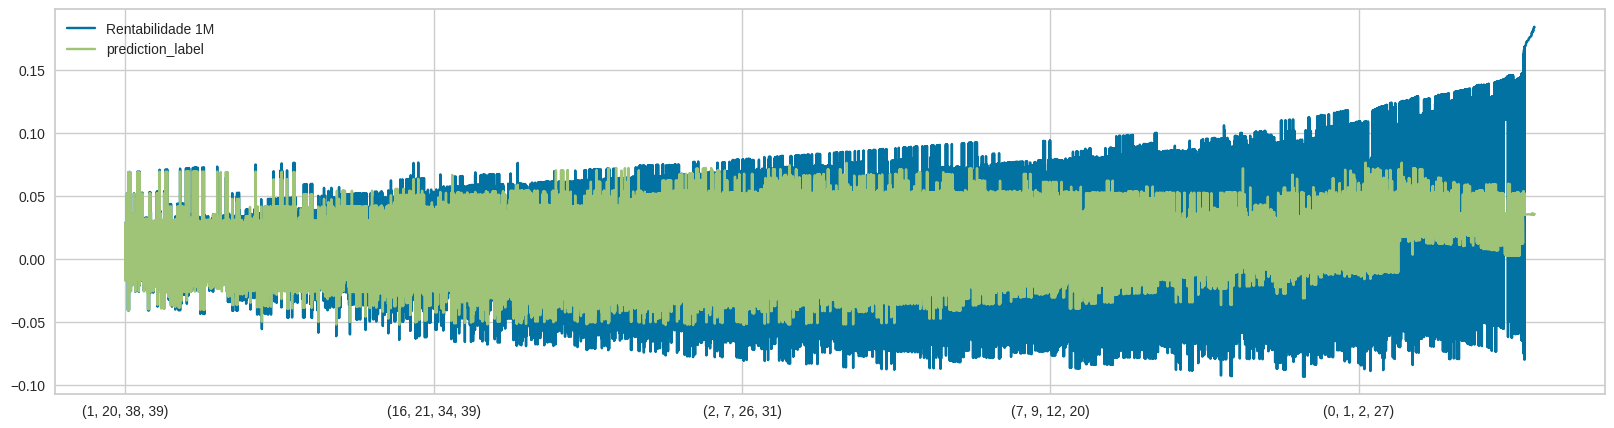

In [41]:
#df_final.sort_values(by='diferença', ascending=False)['diferença'].plot(figsize=(20,5))
# np.exp( df_final.sort_values(by='diferença', ascending=False)[['1RM', 'Predictions']].iloc[0000:1000000] ).plot(figsize=(20,5))
( df_final.sort_values(by='diferença', ascending=True)[['Rentabilidade 1M', 'prediction_label']].iloc[0000:100000000] ).plot(figsize=(20,5))
#( df_final[['Rentabilidade 1M', 'prediction_label']].iloc[0000:1000] ).plot(figsize=(20,5))

In [46]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Evaluating the model
mse = mean_squared_error(unseen_predictions['Rentabilidade 1M'], unseen_predictions['prediction_label'])
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(unseen_predictions['Rentabilidade 1M'], unseen_predictions['prediction_label'])
print(f'R-squared: {r2}')

Mean Squared Error: 0.002275622692302986
R-squared: 0.12860500928024532


In [43]:
data_teste.sort_values(by='diferença', ascending=False).plot.scatter(x='diferença', y='Rentabilidade 3 meses',figsize=(20,5))

KeyError: 'diferença'

In [ ]:
data_teste.plot.scatter(x='diferença', y='Rentabilidade 3 meses',figsize=(20,5))

In [ ]:
data_teste[ data_teste['Rentabilidade 3 meses'] < data_teste['Rentabilidade 3 meses'].mean()].plot.scatter(x='diferença', y='Rentabilidade 3 meses',figsize=(20,5))

In [ ]:
data_teste[ data_teste['Rentabilidade 3 meses'] < data_teste['Rentabilidade 3 meses'].mean()*1.1].plot.scatter(x='diferença', y='Rentabilidade 3 meses',figsize=(20,5))

In [ ]:
(data_teste[ data_teste['Rentabilidade 3 meses'] > data_teste['Rentabilidade 3 meses'].mean()*1.2].corr()).iloc[-1].sort_values(ascending=False)

In [ ]:
(data_teste[ data_teste['Rentabilidade 3 meses'] > data_teste['Rentabilidade 3 meses'].mean()*1.2].corr()).iloc[-1].sort_values(ascending=False)

fit_kwargs: dict, default = {} (empty dict)

    Dictionary of arguments passed to the fit method of the model.


COM 10 - 10 ESTIMADORES
Out-of-Bag Score: 0.9831656322972088
Mean Squared Error: 0.00018268003513004195
R-squared: 0.9300470732379512

Out-of-Bag Score: 0.9831656322972088
Mean Squared Error: 0.000498829771739828
R-squared: 0.7367563869963178


COM TODAS 16 - 10 ESTIMADORES
Out-of-Bag Score: 0.9831663369773853
Mean Squared Error: 0.00018010799230706542
R-squared: 0.9310319751901347



COM 10 E 300 ESTIMADORES
Out-of-Bag Score: 0.9999995114670749
Mean Squared Error: 0.0004956513531350412
R-squared: 0.7384337094910116
